---
title: "10-SAS 两样本均数的比较分析"
author: "Simon Zhou"
date: "2025-05-31"
date-modified: "2025-05-31"
format: 
    html:
        code-fold: true
        fig_caption: true
        number-sections: true
        toc: true
        toc-depth: 2
---

In [1]:
%load_ext saspy.sas_magic

## 两样本均数的比较的概述

两均数比较有三种情况: 样本均数和总体均数比较﹑配对设计资料两样本均数的比较和非配对设计资料的两样本均数比较。

- 前两种比较除了可用 `means` 和 `univariate` 过程完成外,还能用 `ttest` 过程完成;
- 而后者一般可用 `ttest` 过程完成.
- 置信区间估计和假设检验在原理上无根本区别,只是考虑问题的角度不同,故也可以利用置信区间估计得到假设检验的结论.
- 单一总体均数的置信区间估计可运用 `means` 过程完成.
- 两独立样本总体均数的置信区间估计可运用 `ttest` 过程完成.

### 什么是 t test

用于评估来自至多两个样本的变量的均值间差异的统计学手段。变量必须是可量化的， 比如身高，产量，体重变化等等指标。

t test反映了基于期望的显著性水平，你所观察到的差异是否 "显著"。t test使用t分布来评估期望变异程度。

如果你的样本数量大于30，那么假定样本符合正态分布，也就是 z-test 的检验模型。

## 单样本均数的 t 检验

例 5-1 某医生测量 30 例从事铅作业男性工人的血红蛋白含量( g/L),具体数值如下:

| 171 |  79 | 135 |  78 | 118 | 175 | 122 | 105 | 111 | 140 |
|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| 138 | 132 | 142 | 140 | 168 | 113 | 131 | 145 | 128 | 124 |
| 134 | 116 | 129 | 155 | 135 | 134 | 136 | 113 | 119 | 132 |


问这批工人的血红蛋白是否不同于正常成年男性平均数140g/L?


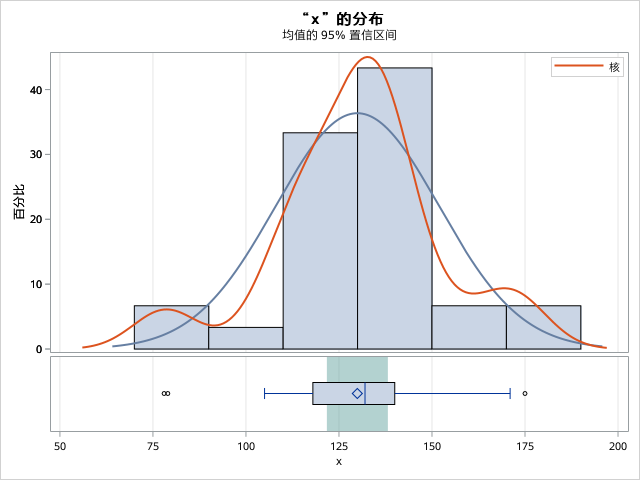
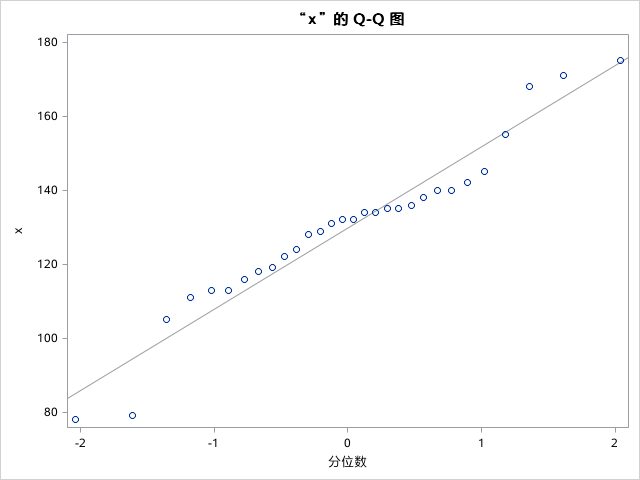

In [3]:
%%SAS
data prg5_1;
    input x @@;
datalines;
171 79 135 78 118 175 122 105 111 140
138 132 142 140 168 113 131 145 128 124
134 116 129 155 135 134 136 113 119 132
;
run;
proc ttest h0=140;
var x;
run;

### 结果说明

1. 第一部分结果显示了分析变量 x 的一些描述性统计量,包括例数(N),均数(Mean),标准差(Std Dev),标准误( Std Err),最小值( Minimum )和最大值(Maximum )。
2. 第二部分结果显示了分析变量 x 置信区间的情况,包括均数(Mean)及其95%置信区间(95%CL Mean)、标准差(Std Dev)及其置信区间(95%CL Std Dev)。
3. 第三部分结果显示了 t 检验的结果,内容包括自由度(DF)检验统计量t值(t Value)和该值所对应的概率值(`Pr> |t|`)。
4. 本例 t 检验的检验统计量等于 -2.51 ,所对应的P值为 `0.0178<0.05` ,说明该样本均数和总体均数的差异有统计学意义,即从事铅工作的男性工人血红蛋白的含量要低于正常成人。

## 配对资料两样本均数比较的t检验

当配对资料原始变量值是已知的,可用 means、univariate 和 ttest 过程完成t检验。

例5-2 为比较两种方法对乳酸饮料中脂肪含量测定结果是否不同,某人随机抽取了10份乳酸饮料制品,分别用哥特里-罗紫法和脂肪酸水解法测定,其结果见表5-1。问两法测定结果是否不同?

| 方法             | 1     | 2     | 3     | 4     | 5     | 6     | 7     | 8     | 9     | 10    |
|------------------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| 哥特里-罗紫法     | 0.840 | 0.591 | 0.674 | 0.632 | 0.687 | 0.978 | 0.750 | 0.730 | 1.200 | 0.870 |
| 脂肪酸水解法      | 0.580 | 0.509 | 0.500 | 0.316 | 0.337 | 0.517 | 0.454 | 0.512 | 0.997 | 0.506 |

### means 过程

In [4]:
%%SAS
/* programme 5-2*/
data prg5_2;
    input x1 x2 @@;
    d = x1 - x2;
datalines;
0.840 0.580 0.591 0.509 0.674 0.500 0.632 0.316 0.687 0.337 
0.978 0.517 0.750 0.454 0.730 0.512 1.200 0.997 0.870 0.506
;
run;
proc means n mean std stderr t prt;
    var d;
run;

### univariate 过程

In [5]:
%%SAS
/* programme 5-3*/
proc univariate data = prg5_2;
    var d;
run;

### ttest 过程


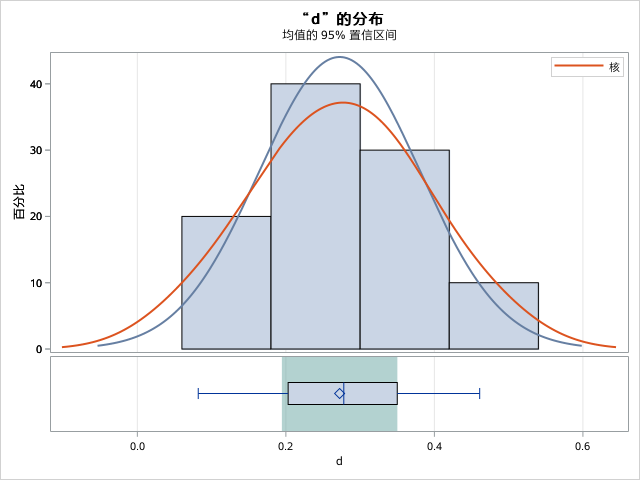
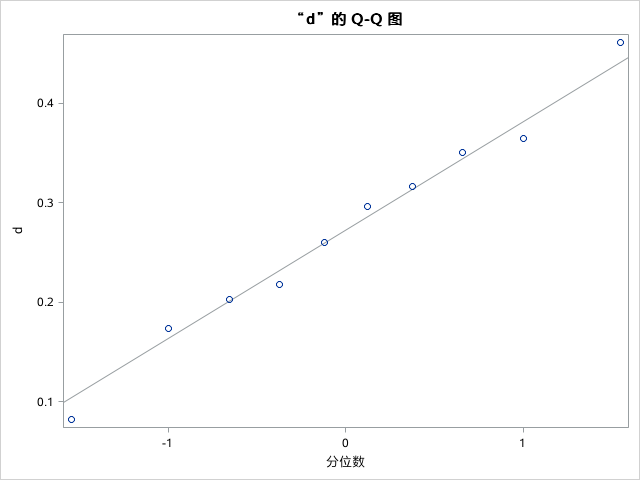

In [6]:
%%SAS
/* programme 5-4*/
proc ttest data = prg5_2;
    var d;
run;

## 两样本均数比较的 t 检验

两样本均数比较的t检验—般用ttest过程。

例 5-3 欲考察牙周炎患者和正常人血清中肿瘤坏死因子-α(TNF-a,U/ml)平均含量是否不同。研究者随机选取了牙周炎患者和正常人各12例,所测定TNF-α的含量见表5-2。问牙周炎患者和正常人间血清中TNF-α平均含量是否不同。

| 分组             | 1     | 2     | 3     | 4     | 5     | 6     |
|------------------|-------|-------|-------|-------|-------|-------|
| 牙周炎患者 x₁    | 9.71  | 10.58 | 11.00 | 7.10  | 7.55  | 8.65  |
| （n₁ = 12）      | 8.87  | 9.02  | 9.88  | 8.68  | 10.52 | 11.02 |
| 正常人 x₂        | 6.52  | 6.80  | 7.12  | 5.50  | 4.89  | 7.03  |
| （n₂ = 12）      | 8.00  | 4.55  | 5.67  | 6.77  | 6.89  | 7.05  |


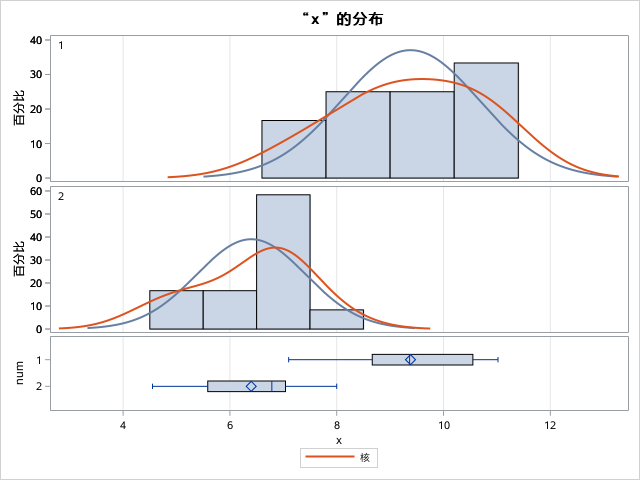
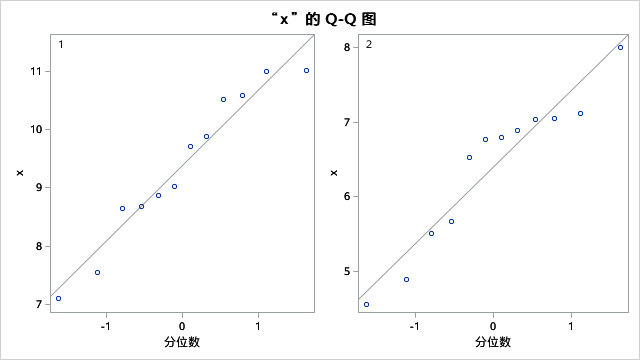

In [7]:
%%SAS
/* programme 5-5*/
data prg5_3;
    input x num @@;
datalines;
9.71 1 10.58 1 11.00 1 7.10 1 7.55 1 8.65 1 
8.87 1 9.02 1 9.88 1 8.68 1 10.52 1 11.02 1 
6.52 2 6.80 2 7.12 2 5.50 2 4.89 2 7.03 2 
8.00 2 4.55 2 5.67 2 6.77 2 6.89 2 7.05 2
;
run;
proc ttest;
    var x;
    class num;
run;


### 结果说明

1. 第一部分是两个组的一些简单描述性统计量,包括每组的例数、均数、标准差、标准误、最小值和最大值,以及两组均数差值的均数、标准差和标准误。
1. 第二部分是两组的均数和标准差及其置信区间,还分别用两种方法( `Pooled` 法和 `Satterthwaite` 法)计算的两组均数差值及其95%置信区间，以及用`Pooled` 方法计算两组标准差的差值及其95%置信区间。
3. 第三部分是 t 检验的结果,该结果包括方差齐性和方差不齐两种情况下的结果。由于本例两组方差齐性(见第四部分说明),故在考察t检验的结果时,应选择方差齐性条件下( method 为 `Pooled`)的检验结果,本例为检验统计量 t=6.27,所对应的 P<0.000 1 ,可以认为两样本均数的差异有统计学意义,可认为牙周炎患者与正常人血清中TNF-α平均含量不同。
4. 第四部分方差齐性检验的结果。本例方差齐性检验的检验统计量 F=1.60 ,其对应的 P=0.449 1 ,可以认为两方差是齐性的。

## ttest 过程常用选项和语句

运用 `ttest` 过程进行 t 检验时,可根据需求增加一些选项或语句,使得到的结果更加符合用户的要求。

### ttest过程的基本格式

```sas
proc ttest <选项>;
    BOOTSTRAP </ options>;
    class 变量名;
    by 变量名1 <变量名2>...;
    var 变量名1 <变量名2>...<选项>;
    paired 变量名 <变量名2>...;
    freq 变量名;
    weight 变量名;
run;
```

### ttest过程的常用选项
1. `alpha=value` 选项将设置一个为 0~1 之间的任意值作为概率值( value ),也可用于指定统计量置信区间的置信水平,默认值为0.05。当此选项设置为0~1区间之外的值时,SAS将提示出错。
2. `CI = type` 指定标准差的置信区间的类型，EQUAL（默认）为 `equal-tailed` 的置信区间，`UMPU` 为基于一致最优无偏检验的置信区间，`NONE` 不输出置信区间；
3. `SIDES = type` 指定单侧、双侧检验，默认 `type=2` 为双侧检验，`L` 为左侧检验，`U` 右侧检验；
4. `cochran` 选项用于指定在方差不齐情况下进行近似 t 检验时,使用 Cochran-Cox 近似法计算近似 t 统计量对应的概率值。

### ttest过程的常用语句
1. `class` 语句用于指定分组变量,该变量的取值将决定样本的分组情况。该语句后面只能跟一个变量名,且该变量必须是分类变量。
2. `by` 语句用于按照某个变量的不同取值,分别进行 `ttest` 过程分析。
3. `paired` 语句用于指定配对 t 检验中要进行比较的变量对。组成变量对的变量或变量列表之间可用 `*` 或 `:` 连接。仅在配对 t 检验时使用,不能和 `class` 语句同时使用,数据格式为将要检验的变量对分成两列(即设置为两个变量)。对于每一个变量对, `ttest` 过程用 `*` 或 `:` 左侧的变量减去右侧的变量,将所得的差值当做新的变量,执行单组样本均数比较的 t 检验。
4. `var` 语句用于指定要进行 t 检验的变量,该语句后面可以跟一个或多个变量名,且这些变量必须是连续变量。
5. `freq` 语句用于指定频数变量,该变量的值将作为每个观测值的权重,即每个观测值的频数。该语句后面只能跟一个变量名,且该变量必须是整数型。
6. `weight` 语句用于指定权重变量,该变量的值将作为每个观测值的权重,即每个观测值的权重。该语句后面只能跟一个变量名,且该变量必须是连续型。

### ttest 绘图

```SAS
PROC TTEST DATA = DATASET PLOTS = (绘图类型);
```

可选的绘图类型：

- `ALL` 或 `NONE`: 绘制全部图形或不绘制任何图形；
- `BOXPLOT`: 箱型图；
- `HISTOGRAM`: 直方图（包括正态分布、核密度线）；
- `INTERVALPLOT`: 均值的置信区间的图形；
- `QQPLOT`: QQ图；
- `SUMMARYPLOT`: 在一张图中绘制直方图和盒形图；
- `AGREEMENTPLOT`: AGREEMENT图；
- `PROFILESPLOT`: PROFILESPLOT图.

注意：`TTEST` 过程步都默认绘制 `QQ` 图和 `SUMMARYPLOT` 图，配对 T 检验还默认绘制 `AGREEMENTPLOT` 图和 `PROFILESPLOT` 图。
另外，指定绘制图形类型之后，那些默认图仍然会绘制，除非加上( `ONLY` ):

```SAS
PROC TTEST data = 数据集 PLOTS(ONLY) = (绘图类型);
RUN;
```



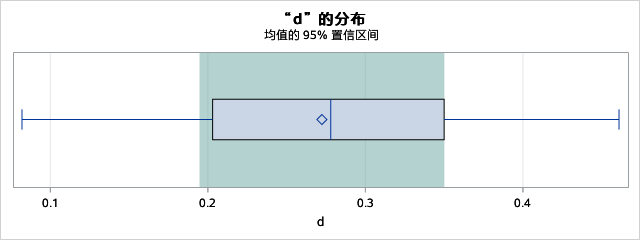

In [ ]:
%%SAS
/*test programme only plot*/
proc ttest data = prg5_2 plots(only) = boxplot;
    var d;
run;


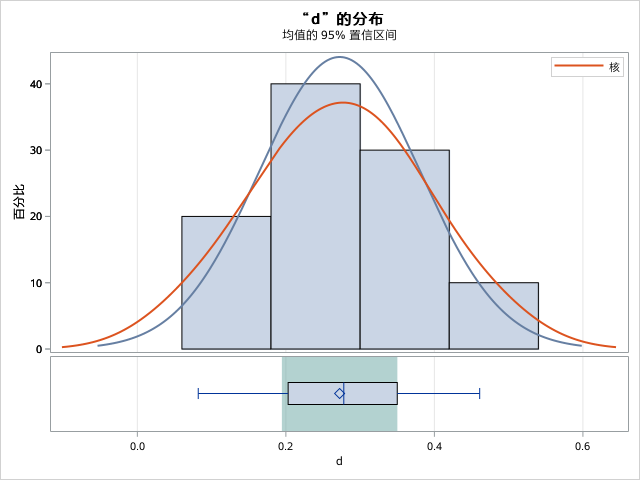
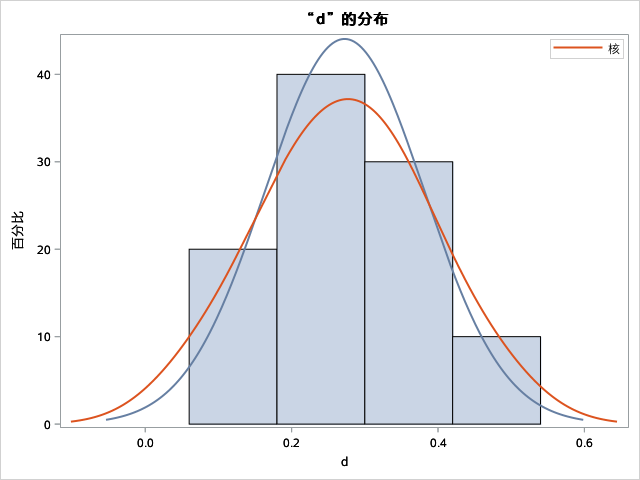
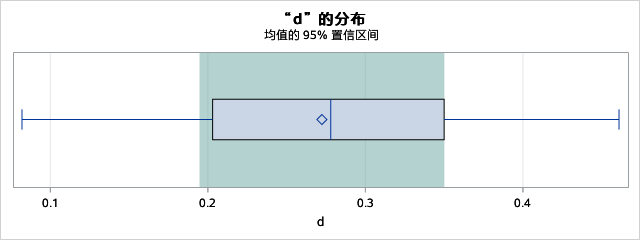
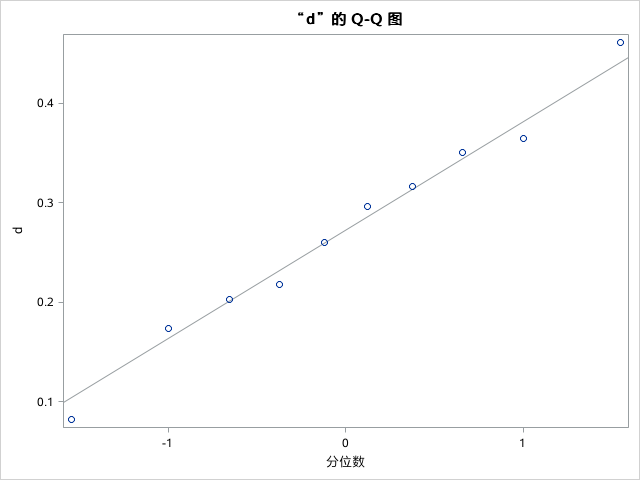

In [13]:
%%SAS
/*test programme multiple plots*/
PROC TTEST data = prg5_2 PLOTS = (BOXPLOT HISTOGRAM QQPLOT);
   var d;
RUN;